In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.utils import resample

In [2]:
iris=load_iris()
X=iris.data[:,:2]
Y=iris.target

setosa_train=X[:25,:]
versicolor_train=X[50:75,:]
virginica_train=X[100:125,:]

X_train=np.append(setosa_train,versicolor_train,axis=0)
X_train=np.append(X_train,virginica_train,axis=0)

setosa_test=X[25:50,:]
versicolor_test=X[75:100,:]
virginica_test=X[125:150,:]

X_test=np.append(setosa_test,versicolor_test,axis=0)
X_test=np.append(X_test,virginica_test,axis=0)

Y_train=Y[:25]
Y_train=np.append(Y_train,Y[50:75])
Y_train=np.append(Y_train,Y[100:125])

Y_test=Y_train

In [152]:
max=0
depth=7
accuracy_array=np.zeros(100)

for i in range (0,100):
    XY_train=np.column_stack((X_train,Y_train))
    XY_resample= resample(XY_train,n_samples=int(XY_train.shape[0]/6) )
    Y_train_new=XY_resample[:,2]
    X_train_new=XY_resample[:,:2]
    clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
    clf = clf.fit(X_train_new,Y_train_new)
    if (i==1):
        best_clf=clf
    Y_pred = clf.predict(X_test)
    #print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    acc=metrics.accuracy_score(Y_test, Y_pred)
    accuracy_array[i]=acc
    if (acc>max):
        max=acc
        best_clf=clf

In [153]:
print('Max accuracy:', accuracy_array.max(),'\nMin accuracy:',accuracy_array.min(),'\nMean accuracy:', accuracy_array.mean())

Max accuracy: 0.8 
Min accuracy: 0.3466666666666667 
Mean accuracy: 0.6000000000000001


Accuracy: 0.8


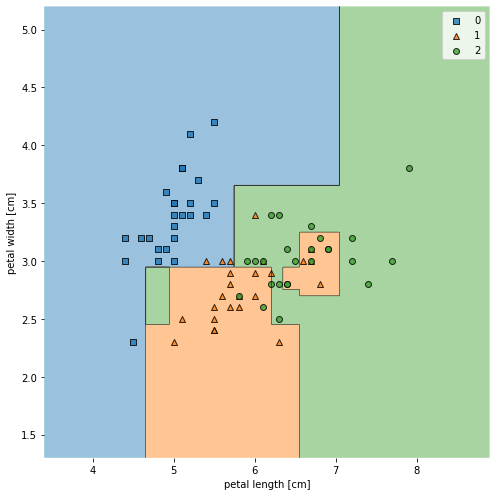

In [111]:
Y_pred = best_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_test,Y_test, best_clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()